In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/trackinguserengagement-data/minutes_watched_2021_paid_0_.csv
/kaggle/input/trackinguserengagement-data/minutes_watched_2021_paid_1_.csv
/kaggle/input/trackinguserengagement-data/minutes_watched_2022_paid_0_.csv
/kaggle/input/trackinguserengagement-data/minutes_watched_2022_paid_1_.csv
/kaggle/input/trackinguserengagement-data/minutes_and_certificates.csv


## I. Plotting the Distributions

In [2]:
df_2021_0=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_watched_2021_paid_0_.csv")
df_2021_1=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_watched_2021_paid_1_.csv")
df_2022_0=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_watched_2022_paid_0_.csv")
df_2022_1=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_watched_2022_paid_1_.csv")
df_mc=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_and_certificates.csv")

In [3]:
df_2021_0.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


In [4]:
df_2021_1.head()

,student_id,minutes_watched,paid_in_q2
0,516,46.27,1
1,520,91.18,1
2,523,1322.25,1
3,603,8.18,1
4,608,387.68,1


In [5]:
df_2022_0.head()

,student_id,minutes_watched,paid_in_q2
0,389,0.15,0
1,801,5732.58,0
2,875,46.77,0
3,1357,0.12,0
4,1373,45.92,0


In [6]:
df_2022_1.head()

,student_id,minutes_watched,paid_in_q2
0,616,116.02,1
1,618,238.15,1
2,838,348.28,1
3,841,324.75,1
4,862,166.73,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

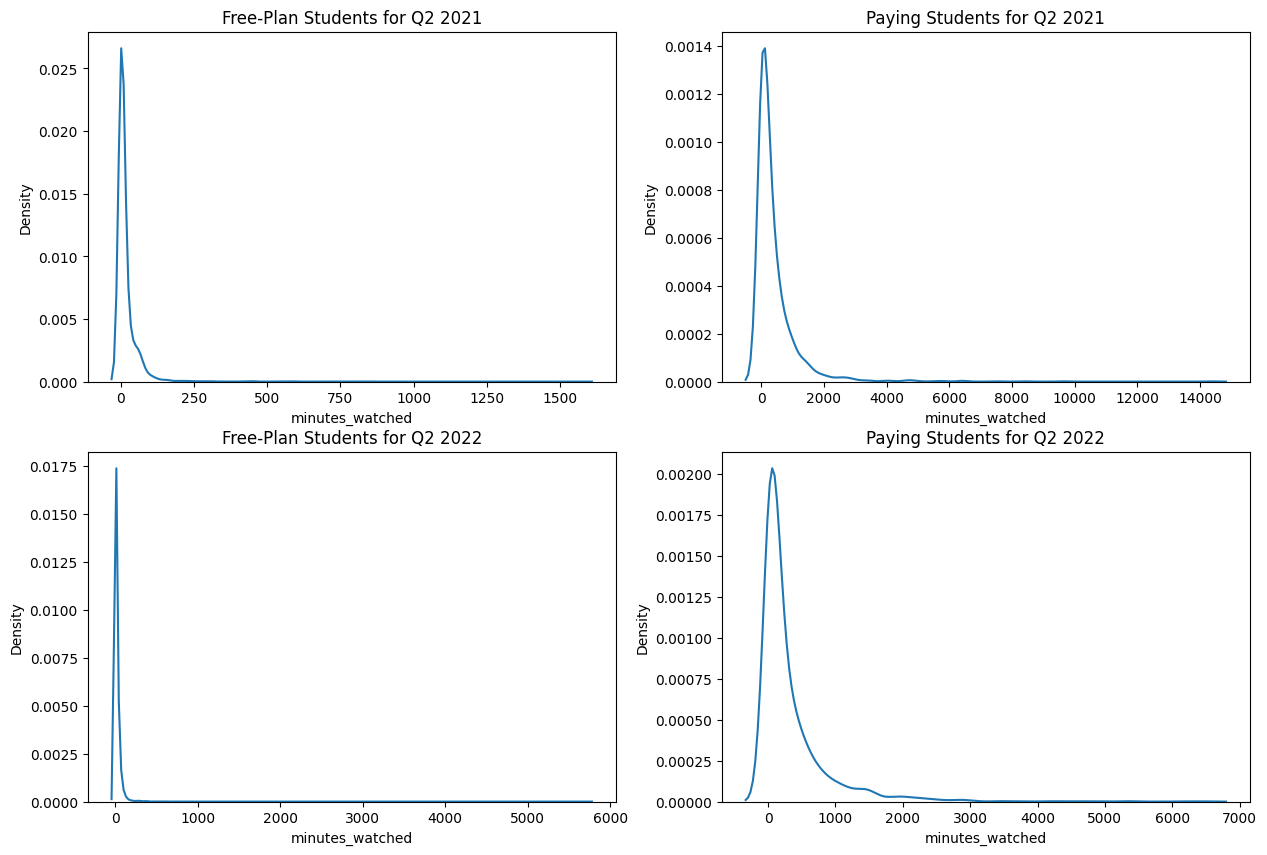

In [7]:
fig, axes = plt.subplots(2, 2, figsize =(15,10))
    
sns.kdeplot(df_2021_0['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(df_2021_1['minutes_watched'], ax = axes[0, 1]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(df_2022_0['minutes_watched'], ax = axes[1, 0]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(df_2022_1['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

plt.savefig("plot.png")
plt.show()

## II. Checking and Removing the Outliers
if outliers, then for each of the datasets, keeping the values lower than the 99th percentile.

In [8]:
q1 = df_2021_0['minutes_watched'].quantile(0.99)
q2 = df_2021_1['minutes_watched'].quantile(0.99)
q3 = df_2022_0['minutes_watched'].quantile(0.99)
q4 = df_2022_1['minutes_watched'].quantile(0.99)
q1

167.08470000000017

In [9]:
df_2021_0_removed_outlier=df_2021_0[df_2021_0["minutes_watched"]<df_2021_0["minutes_watched"].quantile(0.99)]
df_2021_1_removed_outlier=df_2021_1[df_2021_1["minutes_watched"]<df_2021_1["minutes_watched"].quantile(0.99)]
df_2022_0_removed_outlier=df_2022_0[df_2022_0["minutes_watched"]<df_2022_0["minutes_watched"].quantile(0.99)]
df_2022_1_removed_outlier=df_2022_1[df_2022_1["minutes_watched"]<df_2022_1["minutes_watched"].quantile(0.99)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

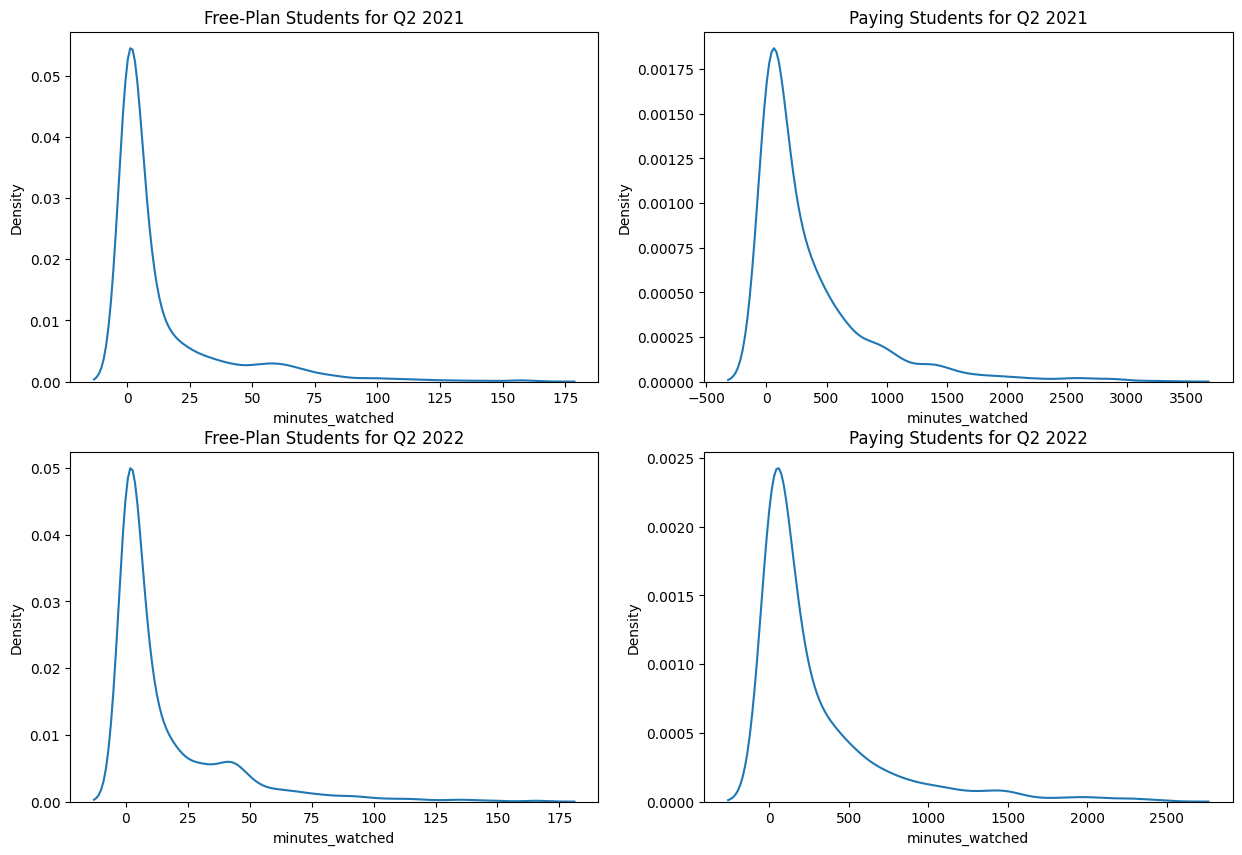

In [10]:
#visualizing after removing outliers
fig, axes = plt.subplots(2, 2, figsize =(15,10))
    
sns.kdeplot(df_2021_0_removed_outlier['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(df_2021_1_removed_outlier['minutes_watched'], ax = axes[0, 1]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(df_2022_0_removed_outlier['minutes_watched'], ax = axes[1, 0]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(df_2022_1_removed_outlier['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

plt.savefig("plot1.png")
plt.show()


In [11]:
# top 1% of "minutes_watched" values are now removed, as were outliers

## III. Saving to CSV Files

In [12]:
# df_2021_0_removed_outlier.to_csv("minutes_watched_2021_paid_0_no_outliers.csv",index=False)
# df_2021_1_removed_outlier.to_csv("minutes_watched_2021_paid_1_no_outliers.csv",index=False)
# df_2022_0_removed_outlier.to_csv("minutes_watched_2022_paid_0_no_outliers.csv",index=False)
# df_2022_1_removed_outlier.to_csv("minutes_watched_2022_paid_1_no_outliers.csv",index=False)

## IV. Model Implementation

In [13]:
data=pd.read_csv("/kaggle/input/trackinguserengagement-data/minutes_and_certificates.csv")
data.head()

,student_id,minutes_watched,certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,9754,702.77,1
3,801,6066.00,13
4,2022,115.37,1


In [14]:
#predictor= "minutes_watched" , target variable="certificates_issued"

X=data[["minutes_watched"]]
y=data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=365,test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_predict=model.predict(X_test)

In [18]:
model.score(X_test,y_test)

0.12374997848146041

In [19]:
model.intercept_, model.coef_

(1.0564011871197372, array([0.00174037]))

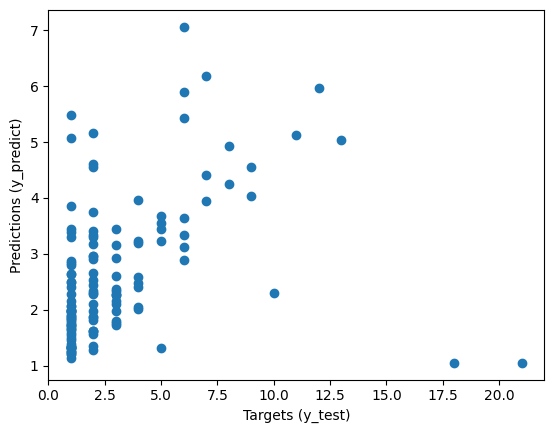

In [20]:
plt.scatter(y_test, y_predict)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_predict)')
plt.savefig("plot2.png")
plt.show()